# 11.1 Date and Time Data Types and Tools

In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
now

datetime.datetime(2018, 3, 3, 14, 10, 38, 8227)

In [4]:
now.year, now.month, now.day

(2018, 3, 3)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days

926

In [7]:
delta.seconds

56700

In [8]:
from datetime import timedelta

In [9]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [11]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [13]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
from dateutil.parser import parse

In [15]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

# 11.2 Time Series Basics

In [17]:
from datetime import datetime

In [18]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), dates)
ts

2011-01-02    0.108636
2011-01-05   -1.092822
2011-01-07    0.368770
2011-01-08   -0.910924
2011-01-10    0.380995
2011-01-12   -0.488452
dtype: float64

In [21]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [22]:
ts + ts[::2]

2011-01-02    0.217272
2011-01-05         NaN
2011-01-07    0.737540
2011-01-08         NaN
2011-01-10    0.761990
2011-01-12         NaN
dtype: float64

## Indexing, Selection, Subsetting

In [23]:
stamp = ts.index[2]
ts[stamp]

0.36877023869893671

In [24]:
ts['1/10/2011']

0.38099496630461477

In [25]:
ts['20110110']

0.38099496630461477

In [26]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts.head()

2000-01-01   -0.199731
2000-01-02   -0.104323
2000-01-03    1.170373
2000-01-04    2.346084
2000-01-05    0.696627
Freq: D, dtype: float64

In [32]:
longer_ts['2001'].size

365

In [31]:
longer_ts['2001-05'].size

31

In [33]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.368770
2011-01-08   -0.910924
2011-01-10    0.380995
2011-01-12   -0.488452
dtype: float64

In [34]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.368770
2011-01-08   -0.910924
2011-01-10    0.380995
dtype: float64

In [35]:
ts.truncate(after='1/9/2011')

2011-01-02    0.108636
2011-01-05   -1.092822
2011-01-07    0.368770
2011-01-08   -0.910924
dtype: float64

In [36]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [43]:
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [44]:
pd.date_range?

In [45]:
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.345883,-0.879075,0.285743,-1.461915
2001-05-09,-0.022119,-0.508107,0.401125,0.124102
2001-05-16,-0.896534,-0.648838,-0.860583,1.298782
2001-05-23,-0.600811,-0.687453,-1.535109,-0.395487
2001-05-30,-1.690629,0.752354,-0.951198,1.222805


## Time Series with Duplicate Indices

In [46]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [47]:
dup_ts.index.is_unique

False

In [48]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [49]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 Date Ranges, Frequencies, and Shifting

In [50]:
ts

2011-01-02    0.108636
2011-01-05   -1.092822
2011-01-07    0.368770
2011-01-08   -0.910924
2011-01-10    0.380995
2011-01-12   -0.488452
dtype: float64

In [53]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

## Generating Date Ranges

In [54]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [55]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [59]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [60]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [61]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## Frequencies and Date O sets

In [62]:
from pandas.tseries.offsets import Hour, Minute

In [63]:
hour = Hour()

In [64]:
four_hours = Hour(4)

In [65]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [67]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq=four_hours)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [68]:
Hour(2) + Minute(30)

<150 * Minutes>

In [69]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [70]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## Shifting (Leading and Lagging) Data

In [71]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -1.542968
2000-02-29   -0.258146
2000-03-31    2.744924
2000-04-30   -0.085010
Freq: M, dtype: float64

In [72]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.542968
2000-04-30   -0.258146
Freq: M, dtype: float64

In [73]:
ts.shift(-2)

2000-01-31    2.744924
2000-02-29   -0.085010
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [74]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -0.832695
2000-03-31   -11.633221
2000-04-30    -1.030970
Freq: M, dtype: float64

In [75]:
ts.shift(2, freq='M')

2000-03-31   -1.542968
2000-04-30   -0.258146
2000-05-31    2.744924
2000-06-30   -0.085010
Freq: M, dtype: float64

In [76]:
ts.shift(3, freq='D')

2000-02-03   -1.542968
2000-03-03   -0.258146
2000-04-03    2.744924
2000-05-03   -0.085010
dtype: float64

In [77]:
from pandas.tseries.offsets import Day, MonthEnd

In [78]:
now = datetime(2011, 11, 17)

In [79]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [80]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [81]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [82]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [83]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [84]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.822350
2000-01-19    0.550626
2000-01-23   -0.516918
2000-01-27    0.483645
2000-01-31    0.240947
2000-02-04   -1.145544
2000-02-08    1.207066
2000-02-12   -0.825775
2000-02-16    0.041842
2000-02-20    1.018504
2000-02-24    1.084791
2000-02-28    0.626686
2000-03-03    1.259987
2000-03-07   -0.179732
2000-03-11    0.402299
2000-03-15   -0.022244
2000-03-19   -0.398705
2000-03-23    0.019645
2000-03-27    1.681892
2000-03-31    0.576869
Freq: 4D, dtype: float64

In [85]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.012810
2000-02-29    0.286796
2000-03-31    0.417501
dtype: float64

In [86]:
ts.resample('M').mean()

2000-01-31   -0.012810
2000-02-29    0.286796
2000-03-31    0.417501
Freq: M, dtype: float64

# 11.4 Time Zone Handling

In [87]:
import pytz

In [88]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [89]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [90]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.223041
2012-03-10 09:30:00    0.908815
2012-03-11 09:30:00   -0.885673
2012-03-12 09:30:00   -0.110567
2012-03-13 09:30:00    1.427456
2012-03-14 09:30:00   -1.170391
Freq: D, dtype: float64

In [92]:
print(ts.index.tz)

None


In [93]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [94]:
ts

2012-03-09 09:30:00    0.223041
2012-03-10 09:30:00    0.908815
2012-03-11 09:30:00   -0.885673
2012-03-12 09:30:00   -0.110567
2012-03-13 09:30:00    1.427456
2012-03-14 09:30:00   -1.170391
Freq: D, dtype: float64

In [95]:
ts_utc = ts.tz_localize('UTC')

In [96]:
ts_utc

2012-03-09 09:30:00+00:00    0.223041
2012-03-10 09:30:00+00:00    0.908815
2012-03-11 09:30:00+00:00   -0.885673
2012-03-12 09:30:00+00:00   -0.110567
2012-03-13 09:30:00+00:00    1.427456
2012-03-14 09:30:00+00:00   -1.170391
Freq: D, dtype: float64

In [97]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [98]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.223041
2012-03-10 04:30:00-05:00    0.908815
2012-03-11 05:30:00-04:00   -0.885673
2012-03-12 05:30:00-04:00   -0.110567
2012-03-13 05:30:00-04:00    1.427456
2012-03-14 05:30:00-04:00   -1.170391
Freq: D, dtype: float64

In [99]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.223041
2012-03-10 14:30:00+00:00    0.908815
2012-03-11 13:30:00+00:00   -0.885673
2012-03-12 13:30:00+00:00   -0.110567
2012-03-13 13:30:00+00:00    1.427456
2012-03-14 13:30:00+00:00   -1.170391
Freq: D, dtype: float64

## Operations with Time Zone−Aware Timestamp Objects

In [100]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [101]:
stamp_utc = stamp.tz_localize('utc')

In [102]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [103]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [104]:
stamp_utc.value

1299902400000000000

In [105]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [106]:
from pandas.tseries.offsets import Hour

In [107]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [108]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

## Operations Between Different Time Zones

In [109]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.958560
2012-03-08 09:30:00   -0.290313
2012-03-09 09:30:00    0.813179
2012-03-12 09:30:00    0.419406
2012-03-13 09:30:00    1.678667
2012-03-14 09:30:00    1.944359
2012-03-15 09:30:00    0.105358
2012-03-16 09:30:00   -1.873100
2012-03-19 09:30:00   -0.030766
2012-03-20 09:30:00   -0.447799
Freq: B, dtype: float64

In [110]:
ts1 = ts[:7].tz_localize('Europe/London')

In [111]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [113]:
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    1.626357
2012-03-12 09:30:00+00:00    0.838813
2012-03-13 09:30:00+00:00    3.357334
2012-03-14 09:30:00+00:00    3.888717
2012-03-15 09:30:00+00:00    0.210716
Freq: B, dtype: float64

In [114]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 Periods and Period Arithmetic

In [115]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [116]:
p+5

Period('2012', 'A-DEC')

In [117]:
pd.Period('2014', freq='A-DEC') - p

7

In [118]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [119]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.453361
2000-02    0.954163
2000-03   -0.840231
2000-04   -0.152863
2000-05   -1.139100
2000-06   -0.615839
Freq: M, dtype: float64

In [120]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## Period Frequency Conversion

In [121]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [122]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [123]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [125]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [126]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [128]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [129]:
p = pd.Period('Aug-2007', 'M')

In [130]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [131]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.411086
2007    0.641478
2008   -0.034475
2009    1.020750
Freq: A-DEC, dtype: float64

In [132]:
ts.asfreq('M', how='start')

2006-01    0.411086
2007-01    0.641478
2008-01   -0.034475
2009-01    1.020750
Freq: M, dtype: float64

In [133]:
ts.asfreq('B', how='end')

2006-12-29    0.411086
2007-12-31    0.641478
2008-12-31   -0.034475
2009-12-31    1.020750
Freq: B, dtype: float64

## Quarterly Period Frequencies

skip

## Converting Timestamps to Periods (and Back)

skip

## Creating a PeriodIndex from Arrays

In [134]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [136]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq="Q-DEC")
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [137]:
data.index = index

In [139]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


# 11.6 Resampling and Frequency Conversion

In [140]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head()

2000-01-01    1.956730
2000-01-02    0.635498
2000-01-03   -0.604364
2000-01-04   -0.094749
2000-01-05   -0.349379
Freq: D, dtype: float64

In [141]:
ts.resample('M').mean()

2000-01-31    0.063305
2000-02-29    0.037527
2000-03-31    0.380495
2000-04-30    0.195429
Freq: M, dtype: float64

In [147]:
ts.resample('M', kind='period').mean()

2000-01    0.063305
2000-02    0.037527
2000-03    0.380495
2000-04    0.195429
Freq: M, dtype: float64

## Downsampling

In [152]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [153]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [155]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

### Open-High-Low-Close (OHLC) resampling

In [156]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## Upsampling and Interpolation

In [157]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.224085,-1.492755,-0.050430,-1.007825
2000-01-12,0.120867,-1.194562,1.139477,0.401858


In [158]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.224085,-1.492755,-0.050430,-1.007825
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.120867,-1.194562,1.139477,0.401858


In [159]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.224085,-1.492755,-0.050430,-1.007825
2000-01-06,1.224085,-1.492755,-0.050430,-1.007825
2000-01-07,1.224085,-1.492755,-0.050430,-1.007825
2000-01-08,1.224085,-1.492755,-0.050430,-1.007825
2000-01-09,1.224085,-1.492755,-0.050430,-1.007825
2000-01-10,1.224085,-1.492755,-0.050430,-1.007825
2000-01-11,1.224085,-1.492755,-0.050430,-1.007825
2000-01-12,0.120867,-1.194562,1.139477,0.401858


In [160]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.224085,-1.492755,-0.050430,-1.007825
2000-01-06,1.224085,-1.492755,-0.050430,-1.007825
2000-01-07,1.224085,-1.492755,-0.050430,-1.007825
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.120867,-1.194562,1.139477,0.401858


In [161]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.224085,-1.492755,-0.050430,-1.007825
2000-01-13,0.120867,-1.194562,1.139477,0.401858


### Resampling with Periods

In [162]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                               freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-0.826363,-0.084857,-1.474403,0.670239
2000-02,-0.982750,-1.907802,1.527126,-0.095889
2000-03,0.018258,-2.504897,0.605648,-0.357327
2000-04,1.542002,3.052442,-0.169156,0.453668
2000-05,-0.141284,1.043157,-0.082746,0.201400


In [163]:
annual_frame = frame.resample('A-DEC').mean()

In [164]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.030834,-0.159769,-0.018333,0.364533
2001,0.012751,0.185620,-0.207669,-0.334176


In [165]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.030834,-0.159769,-0.018333,0.364533
2001Q1,-0.030834,-0.159769,-0.018333,0.364533
2001Q2,-0.030834,-0.159769,-0.018333,0.364533
2001Q3,-0.030834,-0.159769,-0.018333,0.364533
2001Q4,0.012751,0.185620,-0.207669,-0.334176


# 11.7 Moving Window Functions

In [166]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

In [167]:
close_px.AAPL.plot()

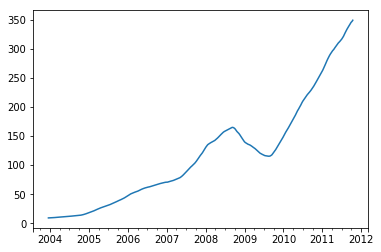

In [168]:
close_px.AAPL.rolling(250).mean().plot()

In [169]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

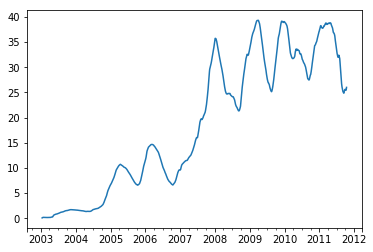

In [170]:
appl_std250.plot()

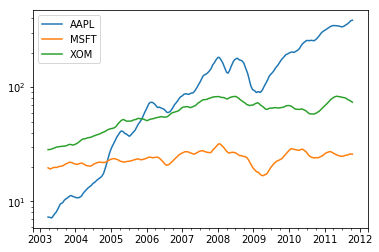

In [171]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [172]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


## Exponentially Weighted Functions

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt

In [178]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

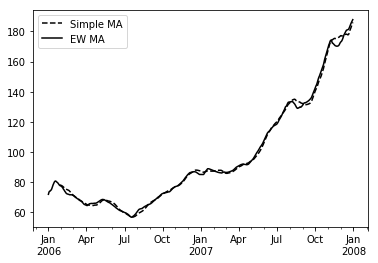

In [182]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

## Binary Moving Window Functions

In [183]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

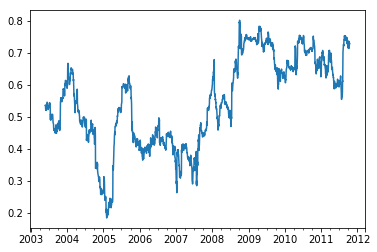

In [185]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

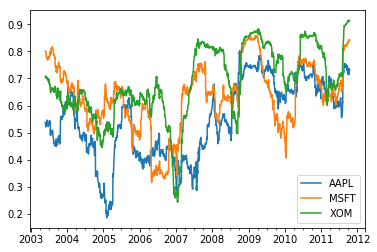

In [186]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

## User-Defined Moving Window Functions

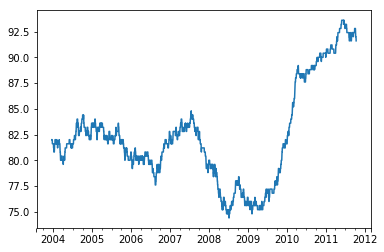

In [187]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()